In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

C:\Users\shahabuddin akhon hr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
df = pd.read_csv('loan_sanction_train.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

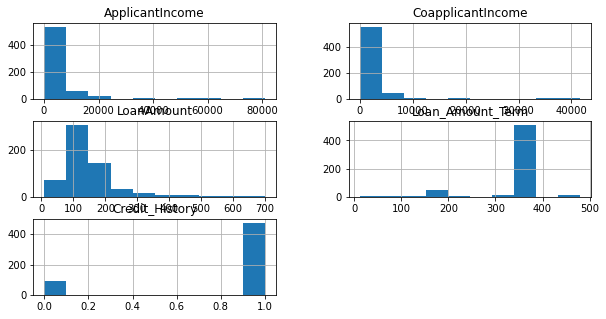

In [18]:
df.hist(figsize=(10,5))

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
import math
median_loan_amount = math.floor(df.LoanAmount.median())
df.LoanAmount.fillna(median_loan_amount, inplace=True)

In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.Gender.fillna(df.Gender.mode(), inplace=True)

In [71]:
gender_map = {'Male': 0, 'Female': 1}
married_map = {'No': 0, 'Yes': 1}
dependents_map = {'0': 0, '1': 1, '2': 2, '3+': 3}
education_map = {'Not Graduate': 0, 'Graduate': 1}
self_employed_map = {'No': 0, 'Yes': 1}
loan_status_map = {'N': 0, 'Y': 1}
property_area_map = {'Urban':1, 'Semi-Urban':2, 'Rural':3}

# Replace values in each column
df['Gender'] = df['Gender'].replace(gender_map)
df['Married'] = df['Married'].replace(married_map)
df['Dependents'] = df['Dependents'].replace(dependents_map)
df['Education'] = df['Education'].replace(education_map)
df['Self_Employed'] = df['Self_Employed'].replace(self_employed_map)
df['Loan_Status'] = df['Loan_Status'].replace(loan_status_map)
df['Property_Area'] = df['Property_Area'].replace(property_area_map)

In [37]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


In [72]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
x = math.floor(df["Dependents"].median())
df["Dependents"].fillna(x, inplace=True)

In [58]:
df.Dependents

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    3.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>]],
      dtype=object)

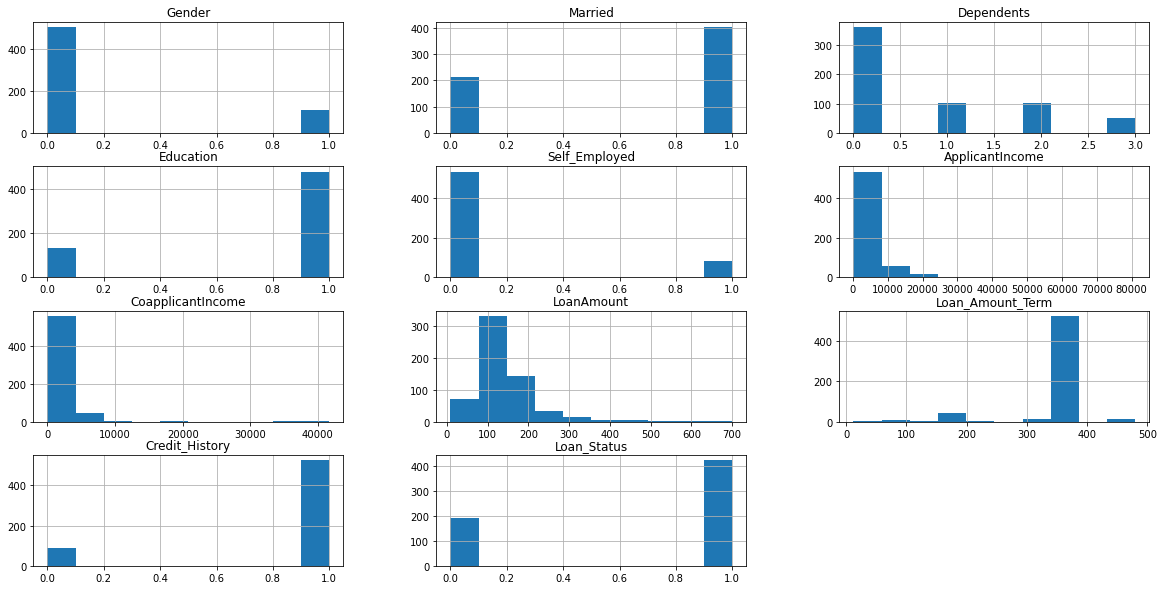

In [63]:
df.hist(figsize=(20,10))

In [70]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [77]:
y = df["Loan_Status"]
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [92]:
x = df[["Gender", "Married", "Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term","Credit_History","LoanAmount"]]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
0,0.0,0.0,0.0,1,0.0,5849,0.0,360.0,1.0,128.0
1,0.0,1.0,1.0,1,0.0,4583,1508.0,360.0,1.0,128.0
2,0.0,1.0,0.0,1,1.0,3000,0.0,360.0,1.0,66.0
3,0.0,1.0,0.0,0,0.0,2583,2358.0,360.0,1.0,120.0
4,0.0,0.0,0.0,1,0.0,6000,0.0,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,360.0,1.0,71.0
610,0.0,1.0,3.0,1,0.0,4106,0.0,180.0,1.0,40.0
611,0.0,1.0,1.0,1,0.0,8072,240.0,360.0,1.0,253.0
612,0.0,1.0,2.0,1,0.0,7583,0.0,360.0,1.0,187.0


In [109]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [110]:
model.coef_

array([ 1.52610462e-02,  9.47037720e-02,  5.57613560e-03,  6.72440435e-02,
       -2.47765936e-03,  9.22648475e-07, -1.03672686e-05, -1.13748094e-04,
        7.06521530e-01, -2.84479867e-04])

In [111]:
model.intercept_

0.05439821451660587

In [112]:
test = pd.read_csv('loan_sanction_test.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [113]:
test_data = [{
    "Gender": 1.0,
    "Married": 1.0,
    "Dependents": 2.0,
    "Education": 1.0,
    "Self_Employed": 0.0,
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 1000,
    "Loan_Amount_Term": 360.0,
    "Credit_History": 1.0,
    "LoanAmount": 200.0,
}]
n = pd.DataFrame(test_data) 
model.predict(n)


array([0.84568156])

In [114]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))